# Playing with Toolkits (Music21)

Today's learning objectives:

- Practice writing loops
- Practice writing functions
- Learn about f-strings.
- Learn to play with an already existing toolkit.


Today we will look at the [music21 toolkit](http://web.mit.edu/music21/) (Cuthbert and Ariza, 2010).

music21 (named after the music building number at MIT) is a Python toolkit for dealing with notated music. It reads kern files, as we've been doing, and it adds a lot of other features, such as an easy notation output. 

Personally, I don't use it too much, but it's still a very good toolkit that's worth knowing a bit about.



## A Problem: Creating a Test Bank for Carmen Quizzes

I need to create a quiz bank to upload to carmen. In order to bulk upload things to Carmen, they need to be in a certain format. It looks like [this](https://drive.google.com/open?id=1jNQeu4DOgAuctc9gdgR5umRYvieC_Cno). Basically I need the document to:

- Begin with an image
- Ask a question.
- Provide a set of answers, itemized by a., b., c., *etc.*
- Put an asterisk next to the correct answer.

Carmen actually randomizes the order of answers, so I don't need to worry about that!

Let's use music21 for this!


In [ ]:
#@title Setting up music21 in the background. { form-width: "30%" }
# !pip install --upgrade music21
#!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
# !apt-get update
!apt-get install musescore
!apt-get install xvfb

import os
os.putenv('DISPLAY', ':99.0')
!start-stop-daemon --start --pidfile /var/run/xvfb.pid --make-pidfile --background --exec /usr/bin/Xvfb -- :99 -screen 0 1024x768x24 -ac +extension GLX +render -noreset
from music21 import *
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'
!sh -e /etc/init.d/x11-common start


## music21 and notation

When I've previously done this task, I used humdrum and a tool called Verovio. I think Verovio looks really ncie, but it has some compatibility issues with python and it only outputs "svg" files, and Carmen needs png. It added an extra conversion step that wasn't really necessary. I can do it all in one go with music21. 

You can use the ```show``` function in music21 to return the notation of an object. 

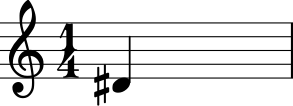

In [ ]:
n = note.Note('D#4')
n.show()

### The Converter

The ```converter.parse``` function can read a number of types of notation. There's the (very) limited tinynotation format, which can do simple monophonic things. 

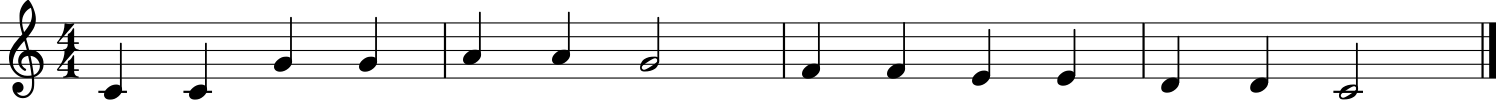

In [ ]:
### the converter.parse function is from music21.
littleMelody = converter.parse('tinynotation: 4/4 c4 c g g a a g2 f4 f e e d d c2')
littleMelody.show()

It can also read kern files like so:

```{python}
for file in file_list:
  melody = converter.parse(file)
  melody.show()
```

but we will return to this in a minute.

### Looping with music21

The code below can take the melody we've written above and transpose it to many keys.

Let's talk through the pseudocode first:

- create a list of possible keys.

```{python}
for each key signature:
  analyze the key of that little melody, and assign it a variable (k)
  use the interval function to show the distance from the tonic and the pitches, and assign it a new variable (i)
  transpose the melody by that interval.
  show it in notation.

```

Much of these are from the "key" class in music21. Check out the documentation [here](https://web.mit.edu/music21/doc/moduleReference/moduleKey.html).

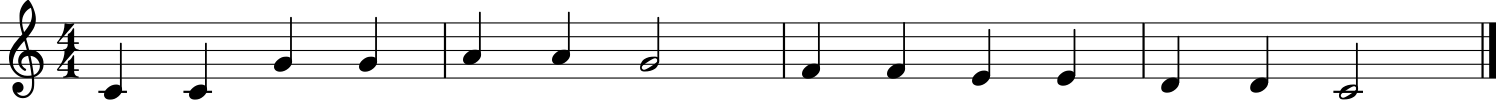

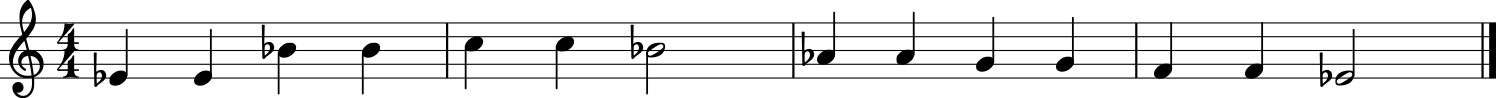

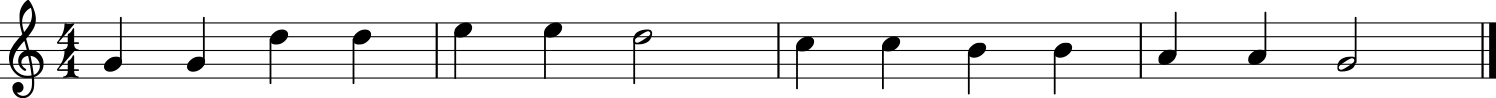

In [ ]:
sigs = ["C", "Eb", "G"]
for keysig in sigs:   
    k = littleMelody.analyze('key')
    i = interval.Interval(k.tonic, pitch.Pitch(keysig))
    new_melody = littleMelody.transpose(i)
    new_melody.show()


## Reading in files.

What about reading in kern files?

First, because we are using Colab, we need to do the same thing we did before, and tell google that it can get to our drive.

In [ ]:
###Let's set the google drive up so that we can access those polska files...
from google.colab import drive
import glob
drive.mount('content', force_remount=True)


Mounted at content


Now we can run that filebrowswer function again. This will grab all polska files.

In [ ]:
def filebrowser(ext="content/MyDrive/computational_drafting/polska/*.krn"):
    "Returns files with an extension"
    return[f for f in glob.glob(f'*{ext}')]

file_list = filebrowser()

And now we can run this loop to show all polska files.

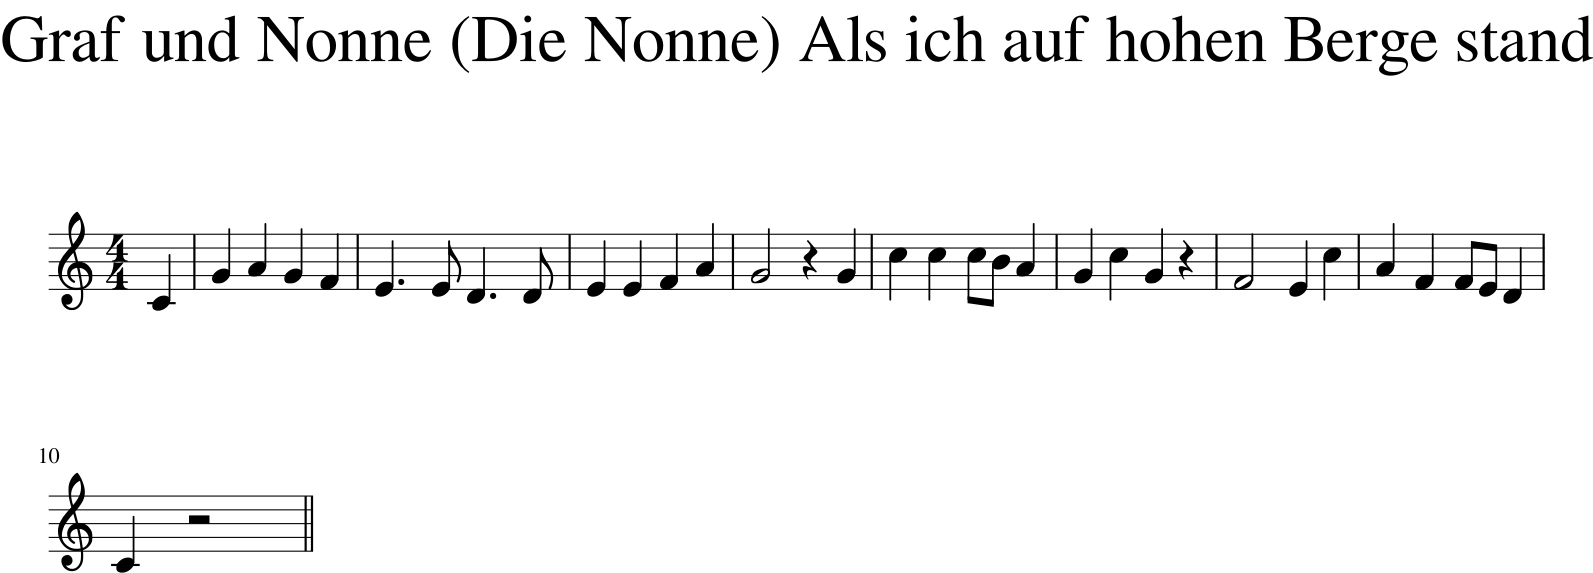

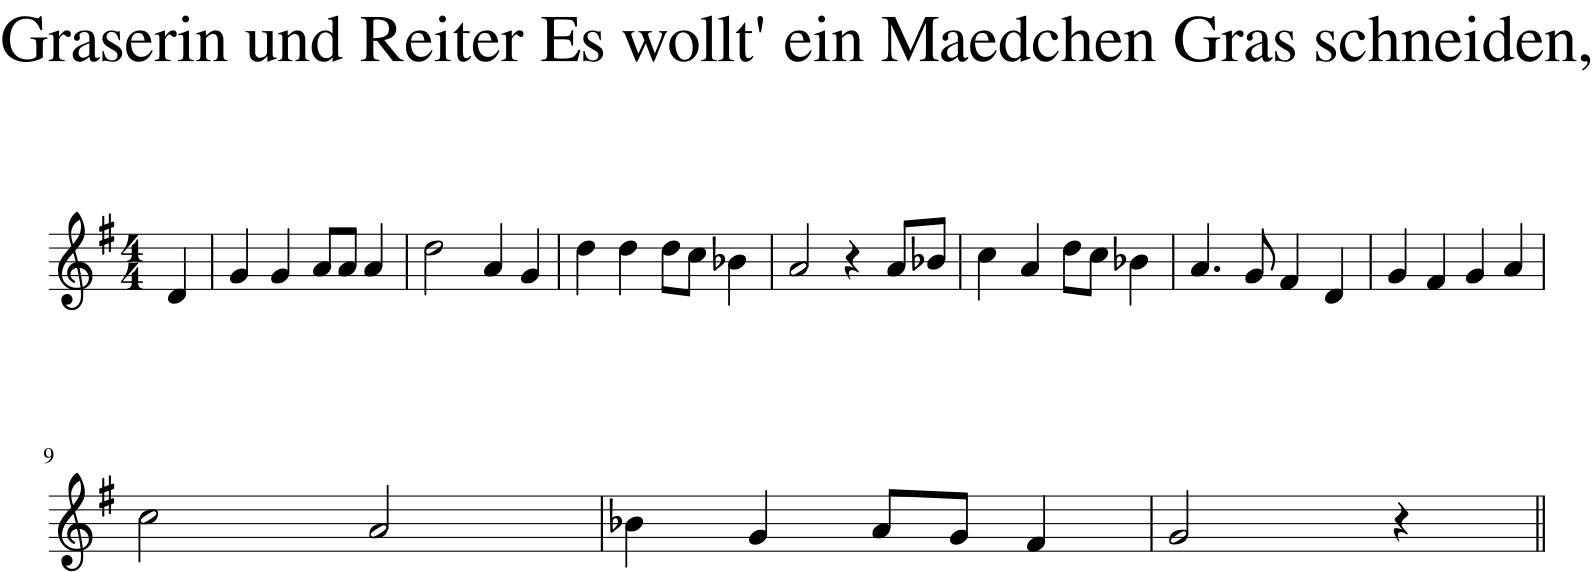

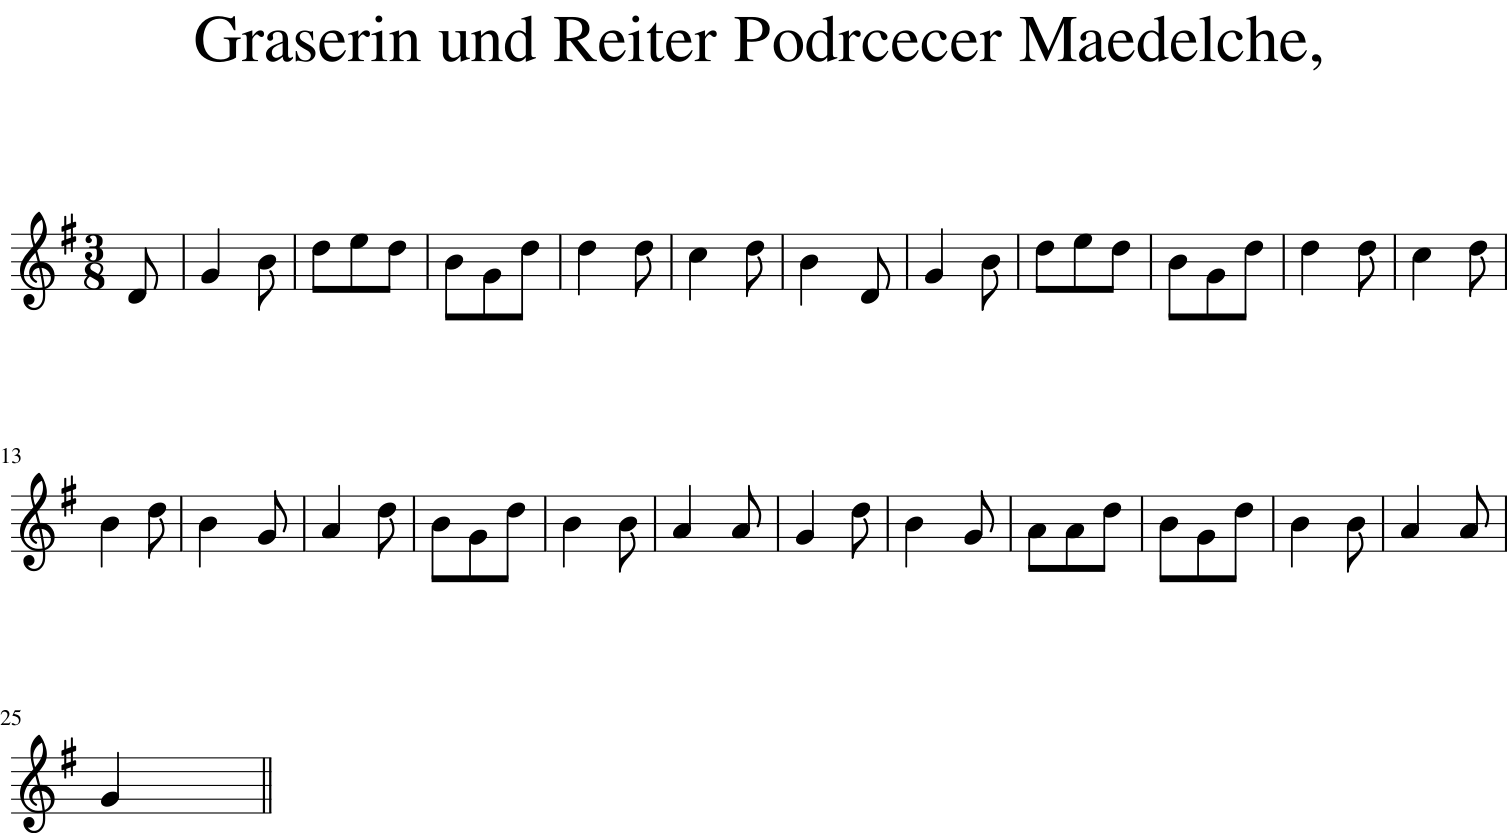

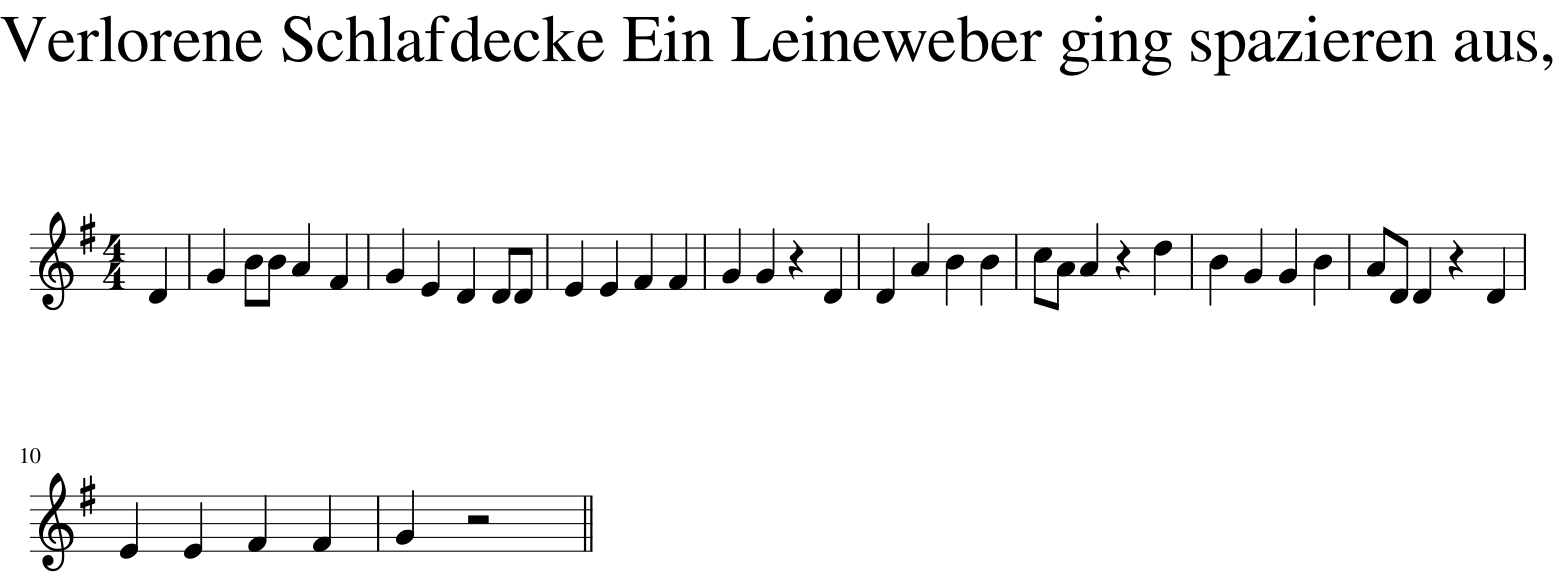

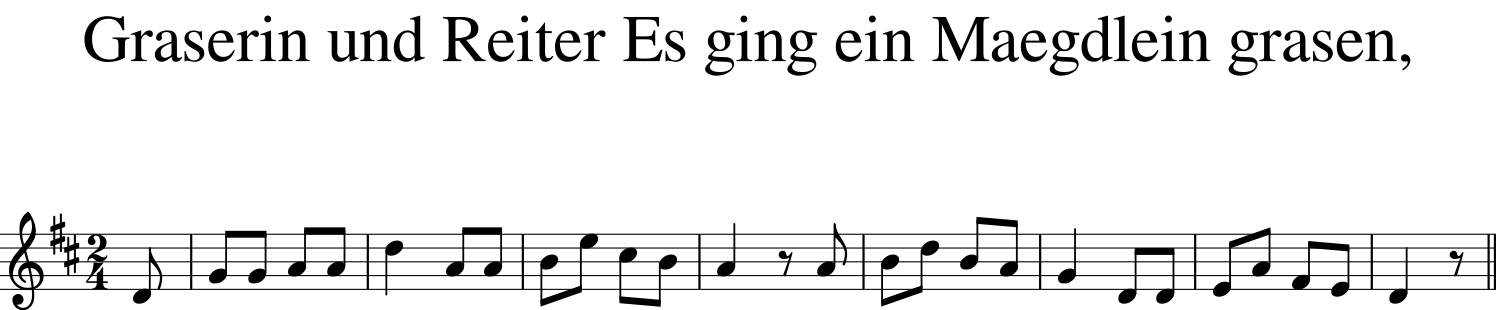

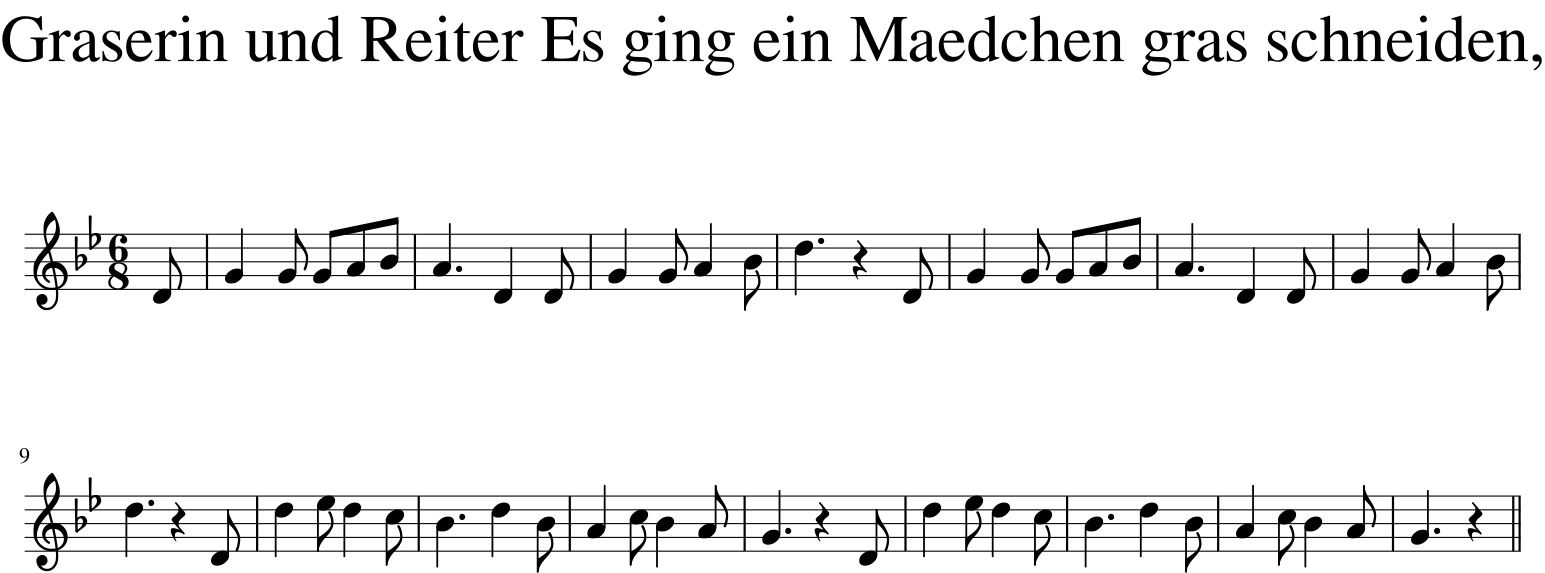

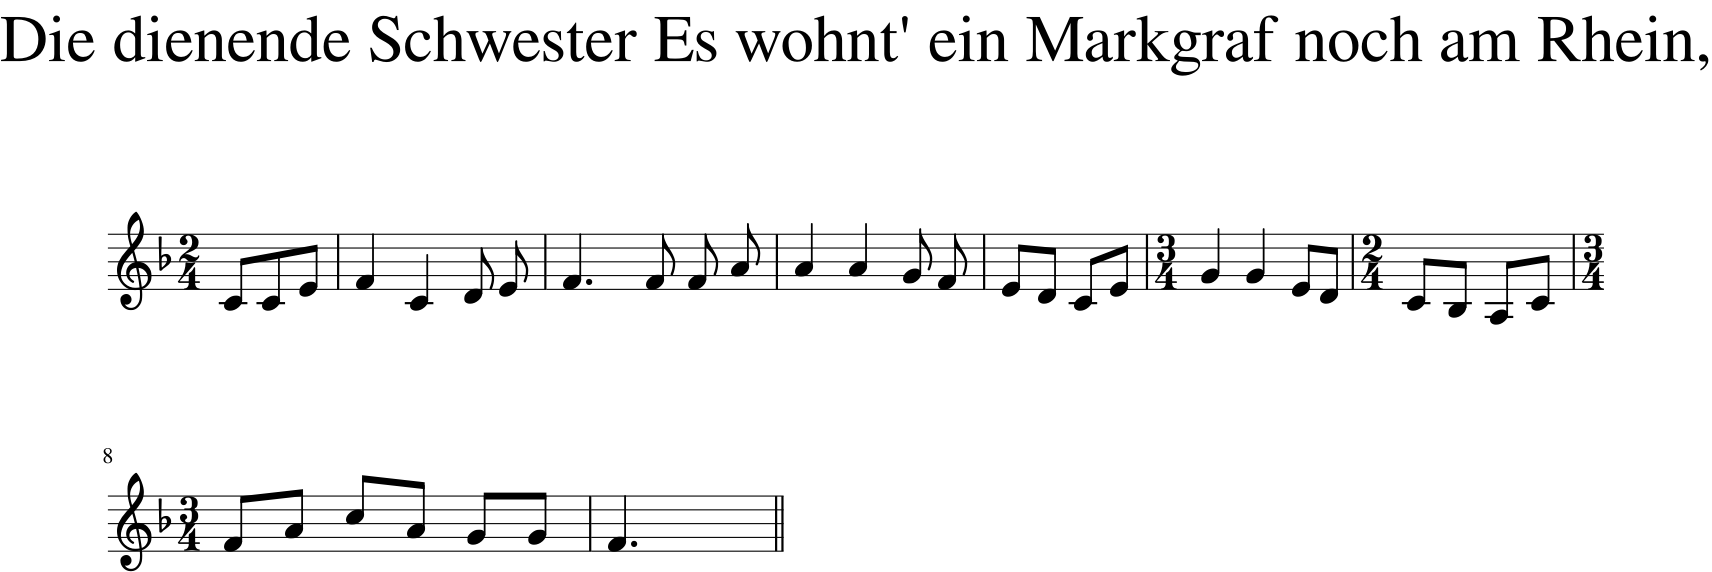

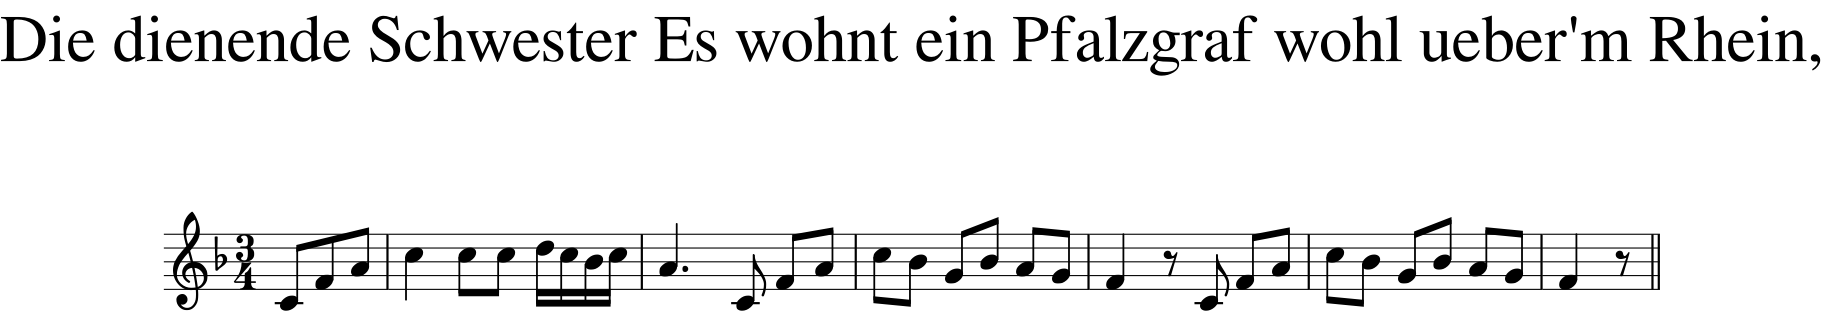

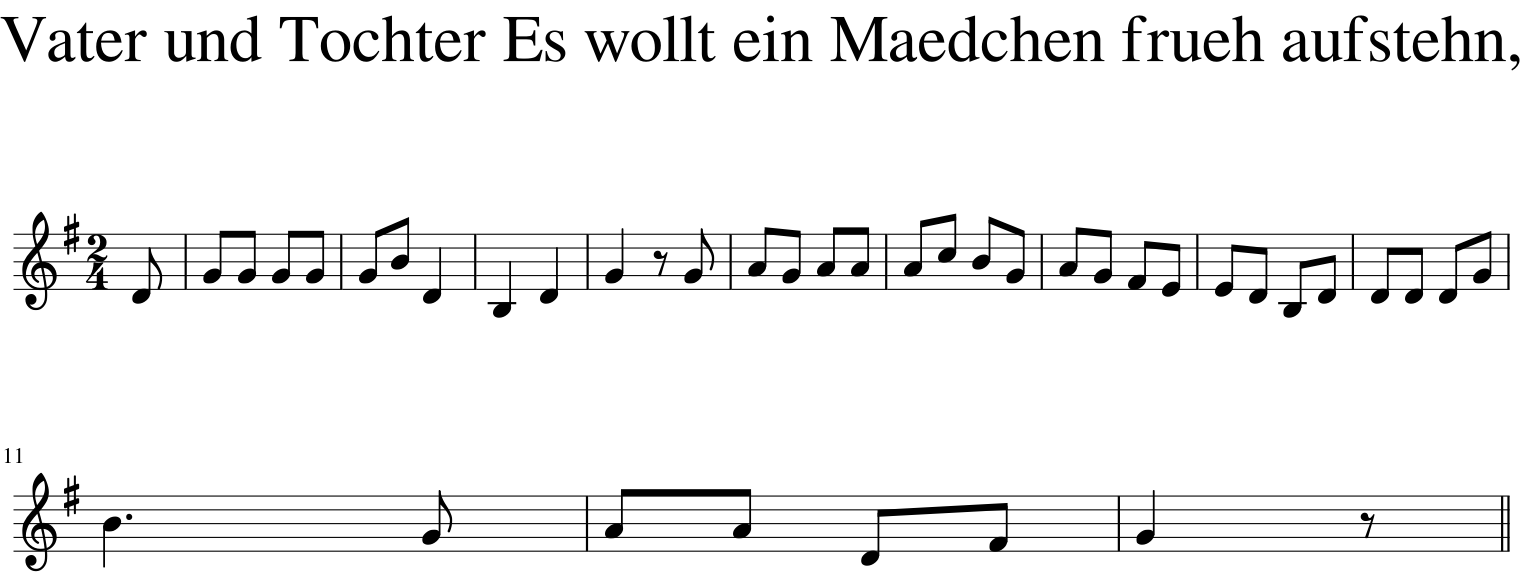

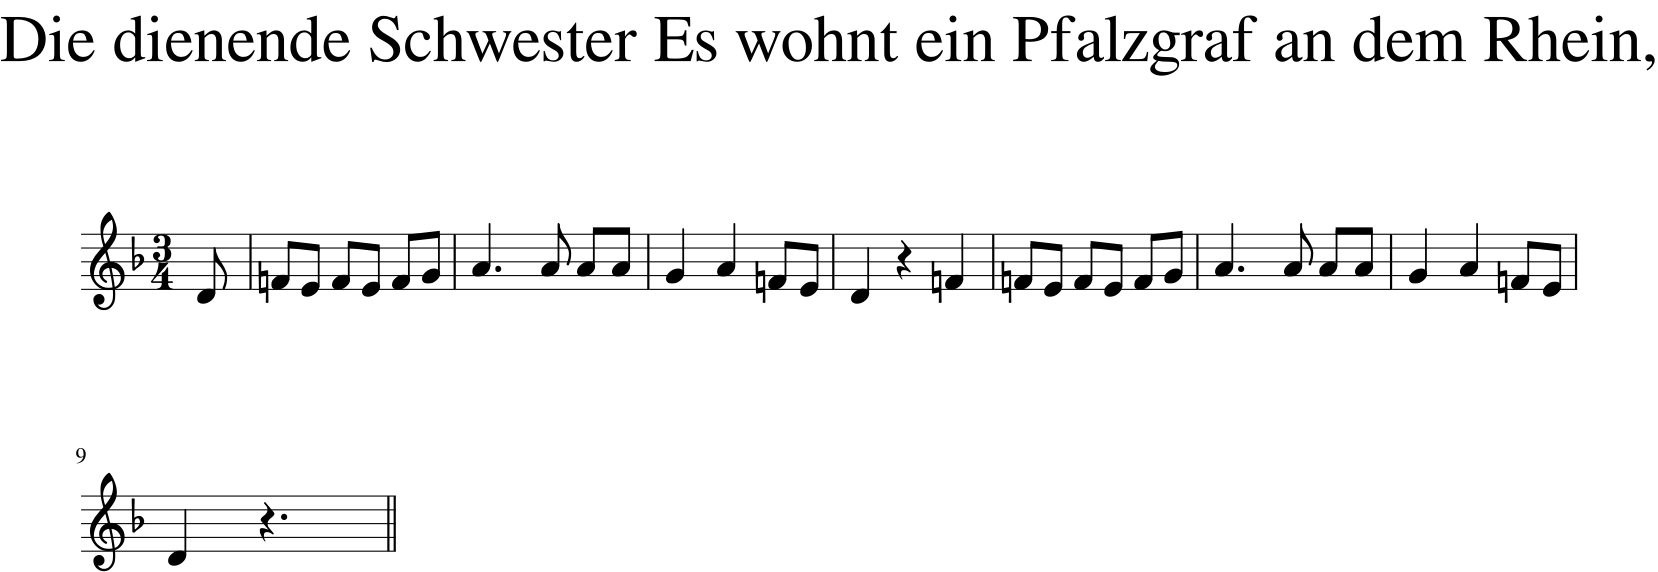

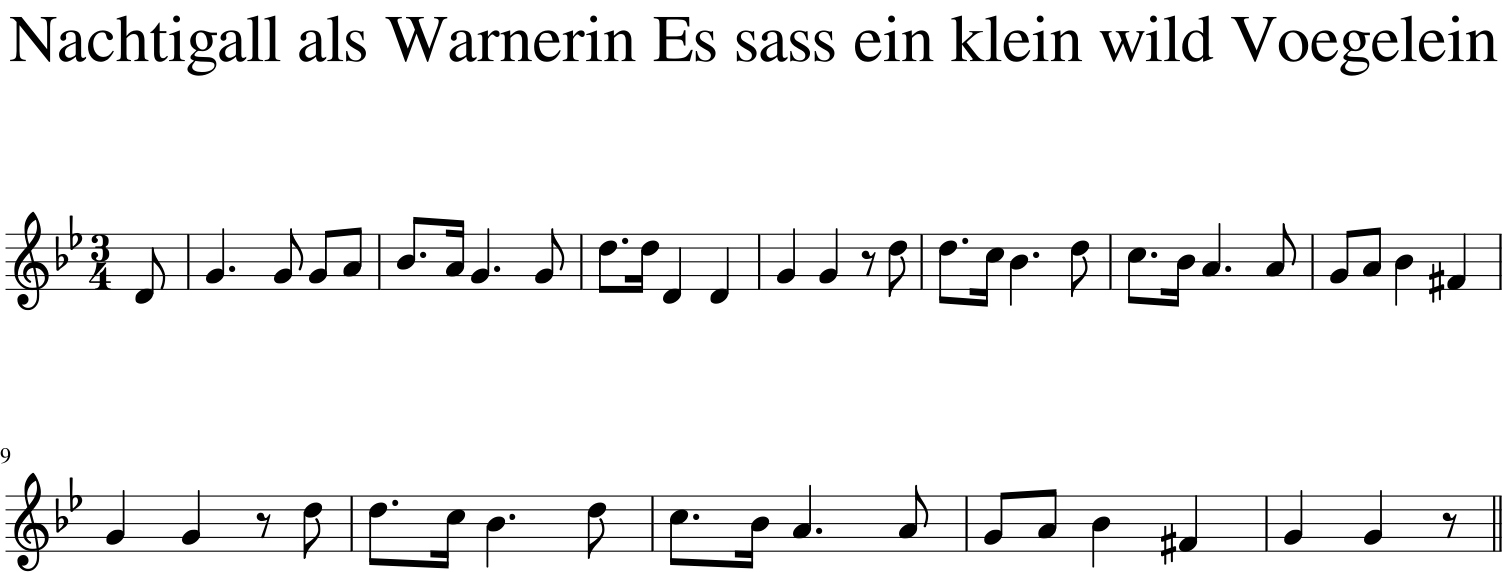

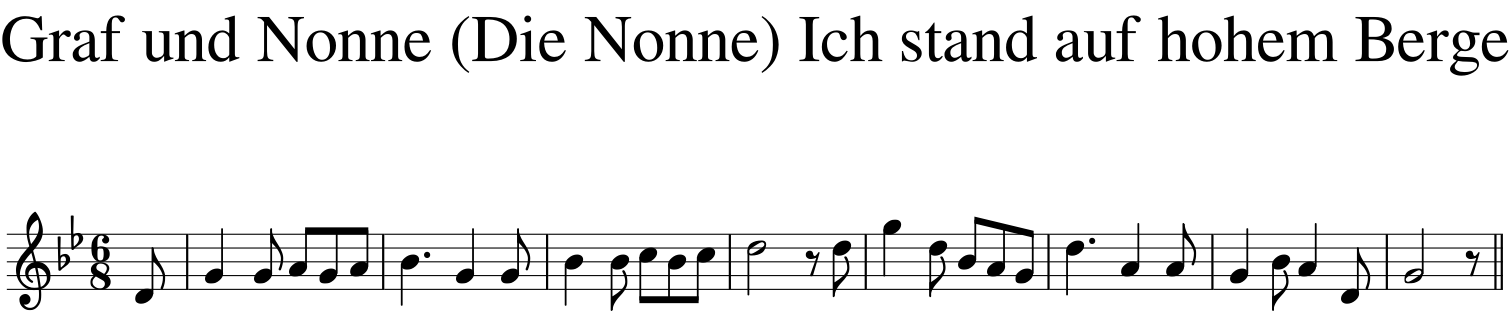

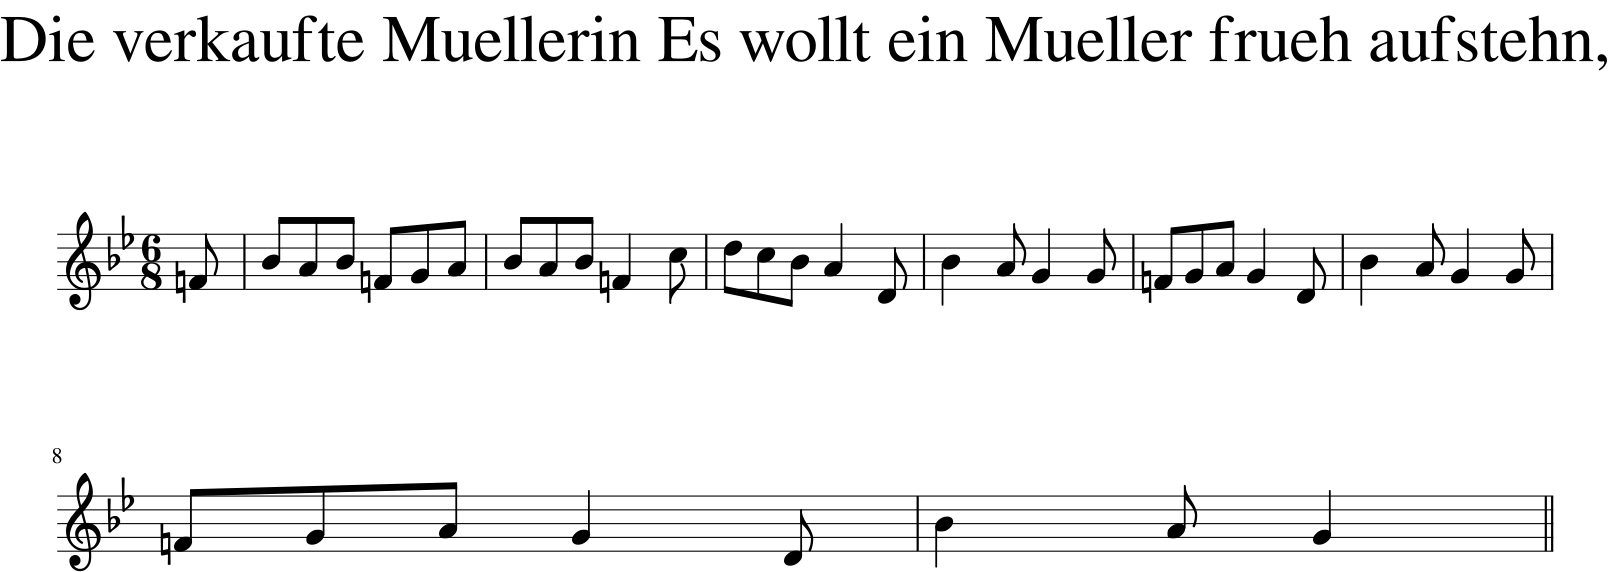

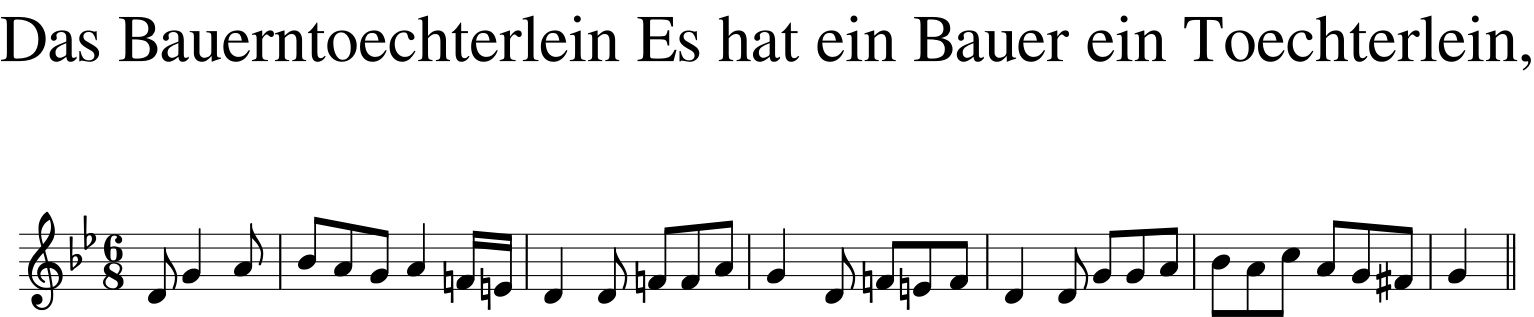

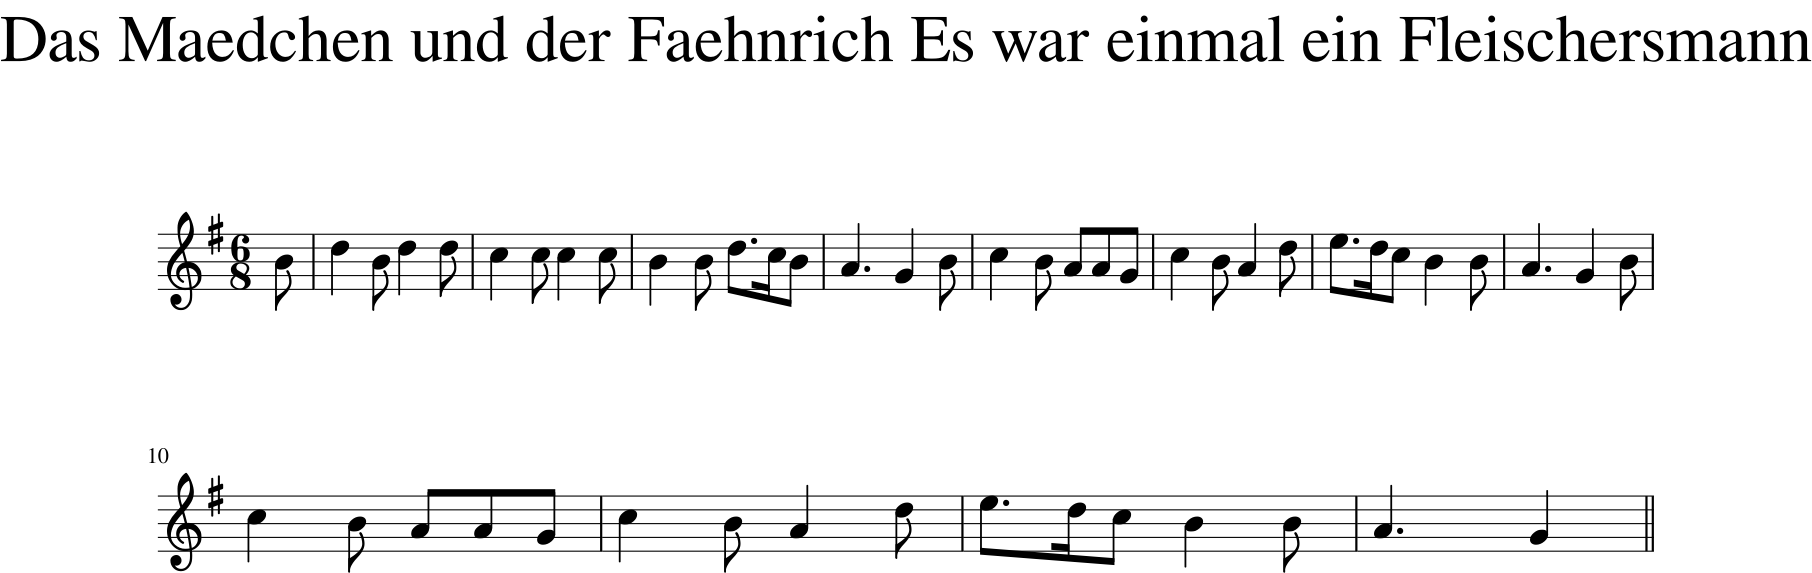

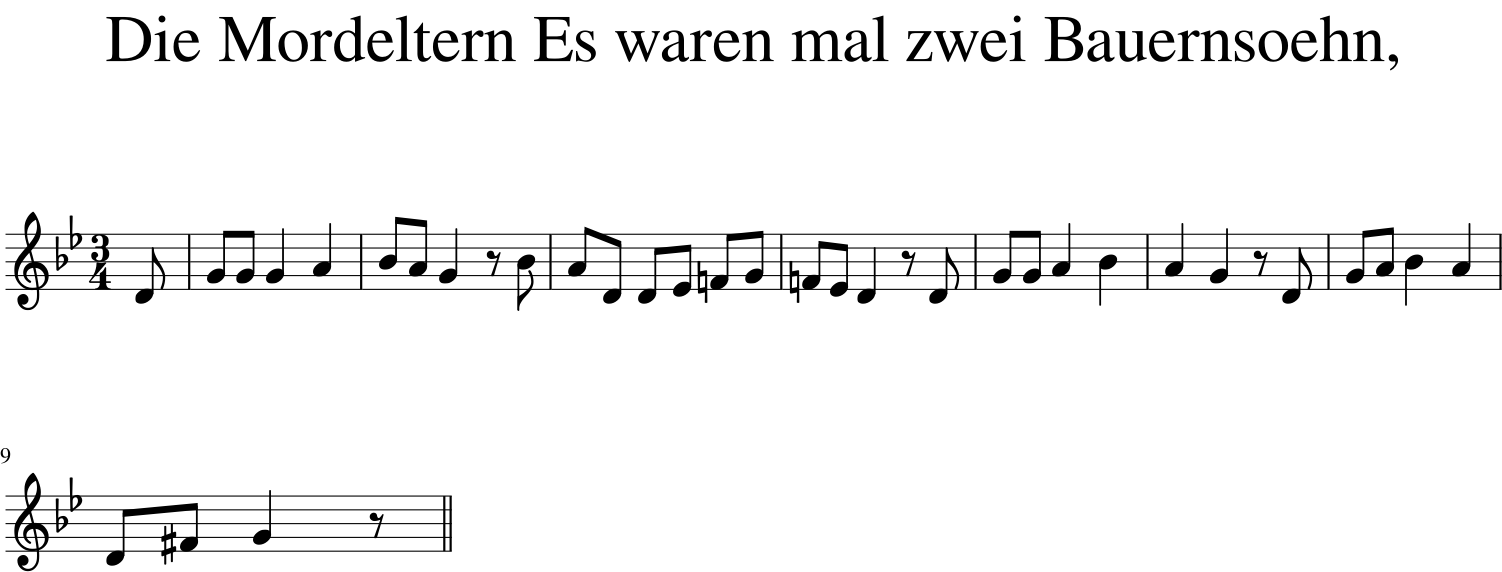

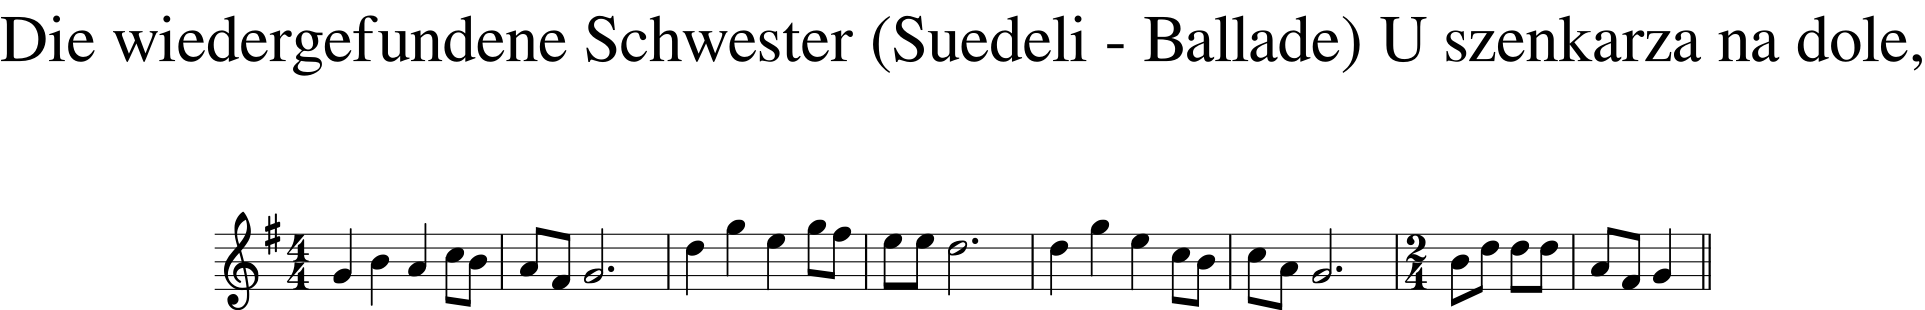

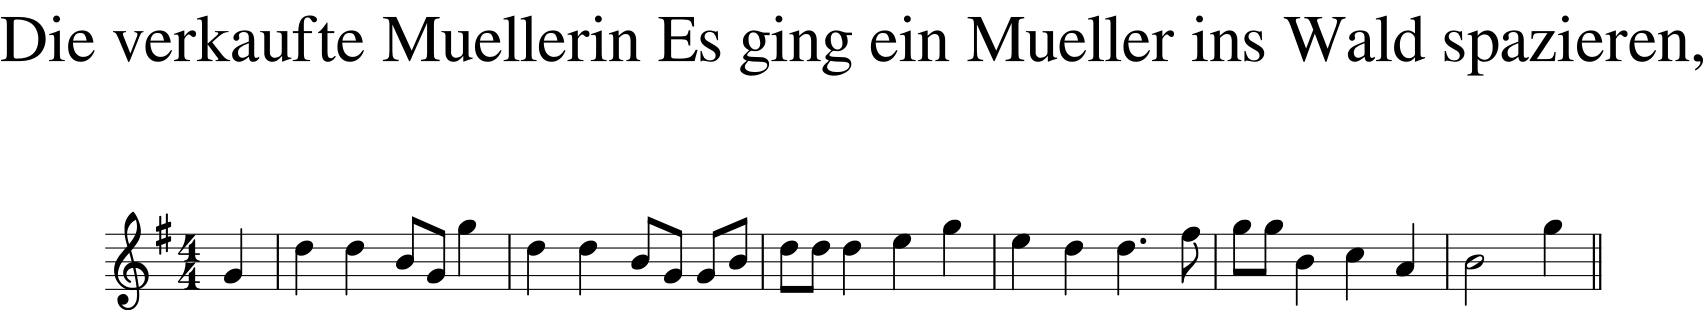

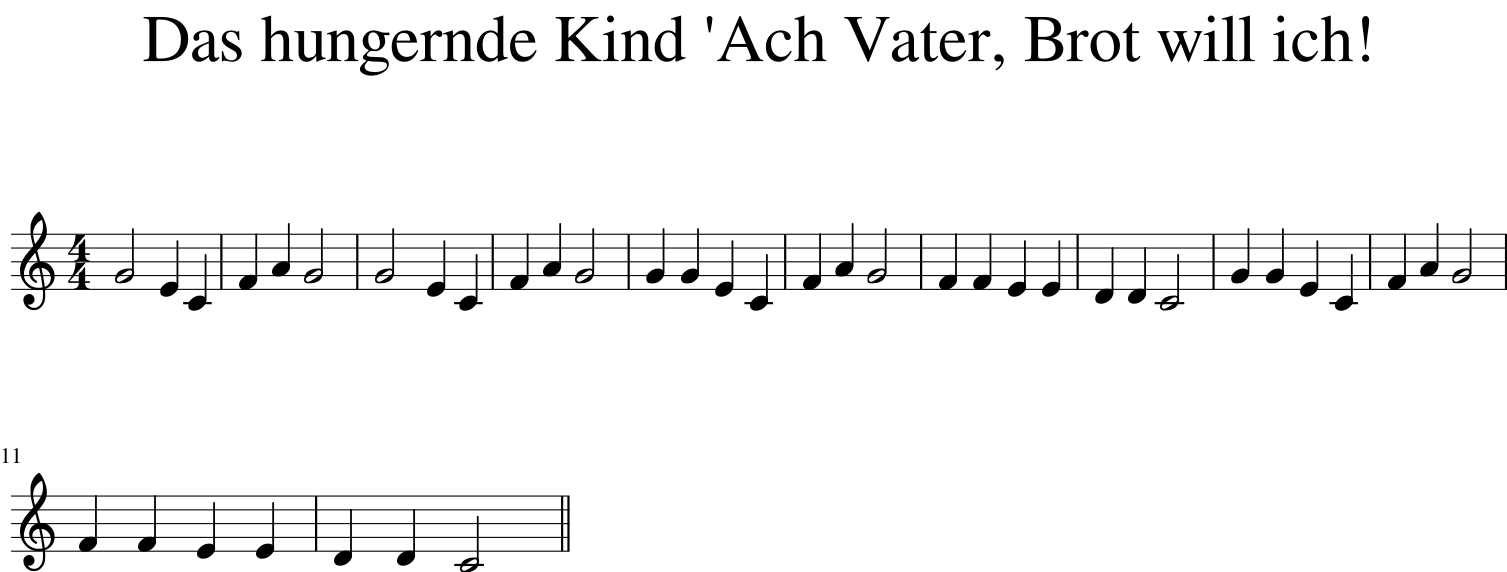

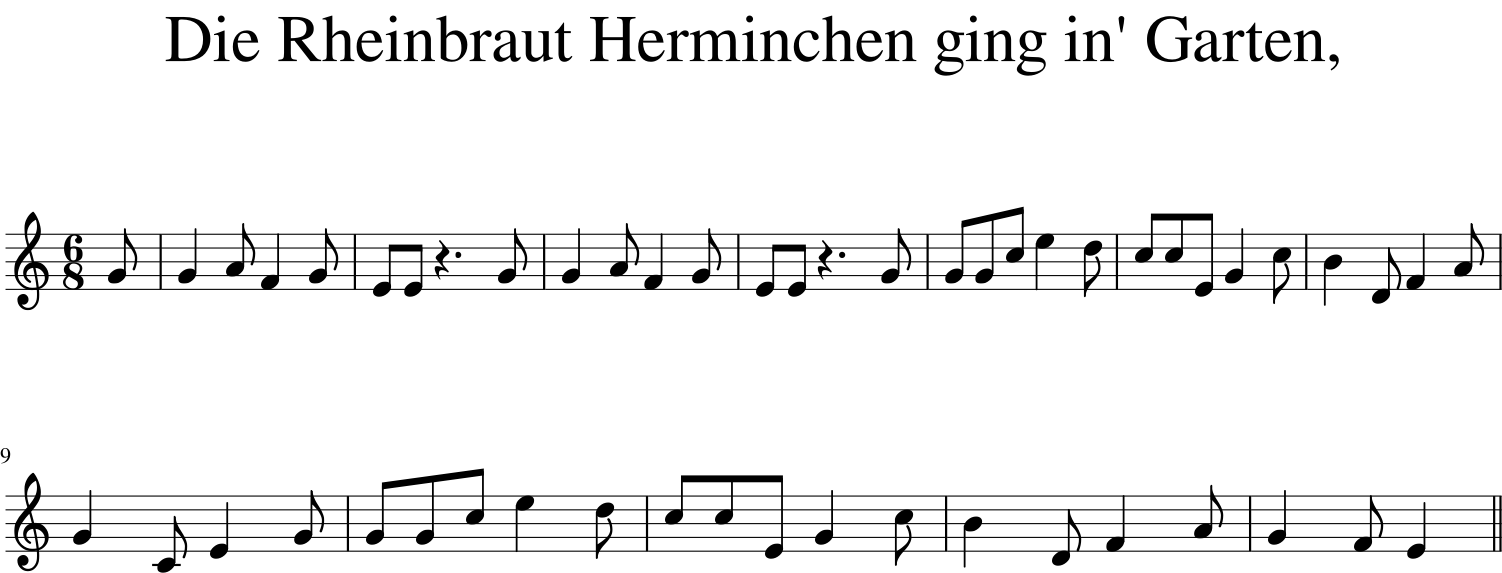

humdrum.spineParser: WARNING: Error in parsing event ('*MX') at position 10 for spine None: Incorrect meter: *MX found


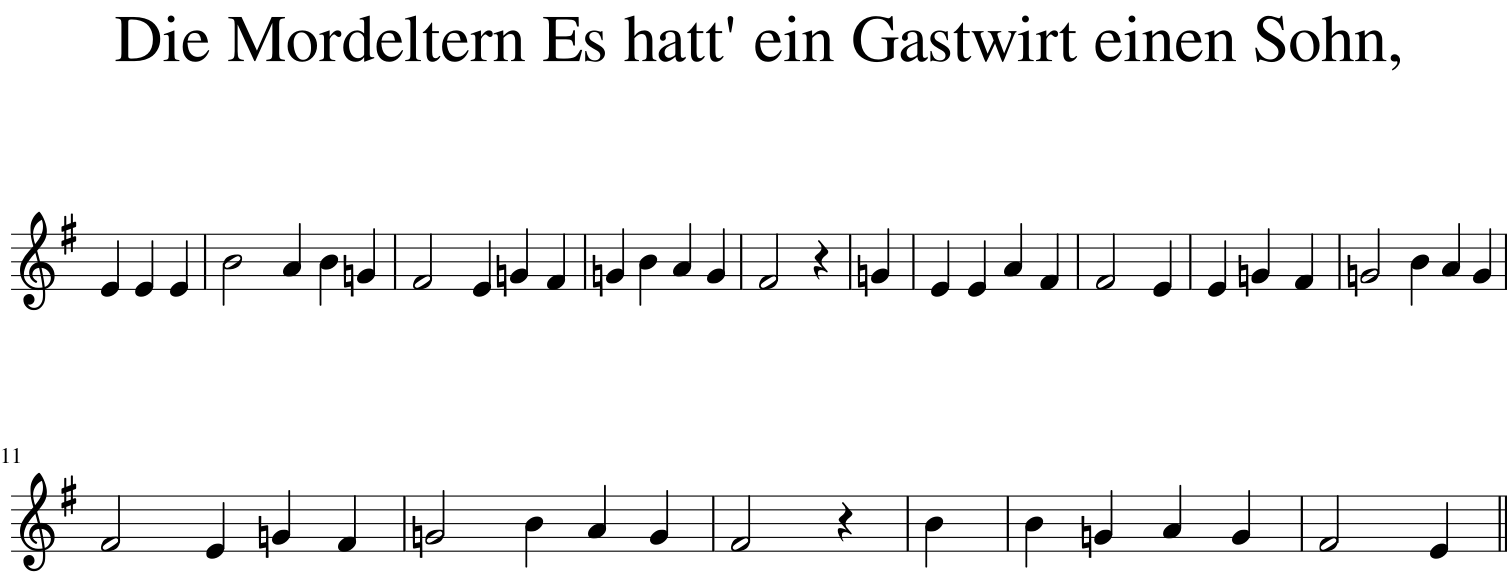

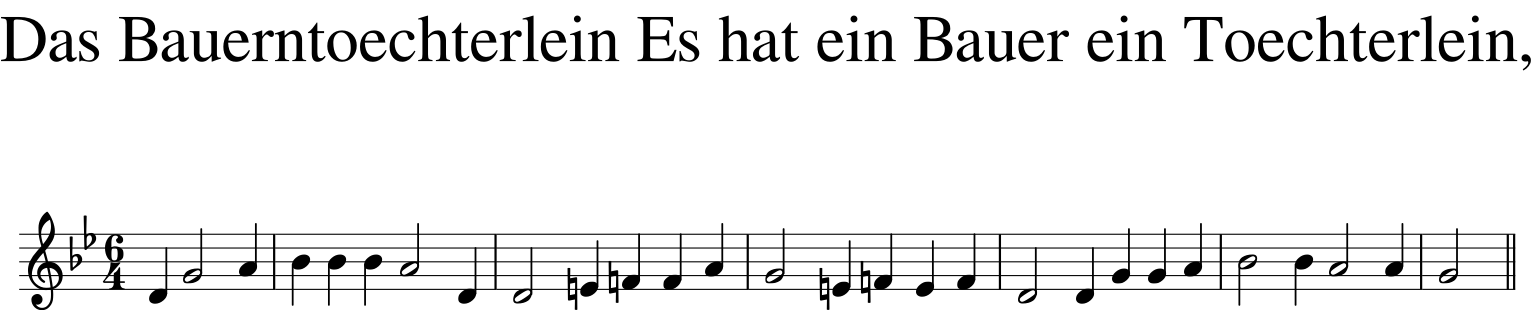

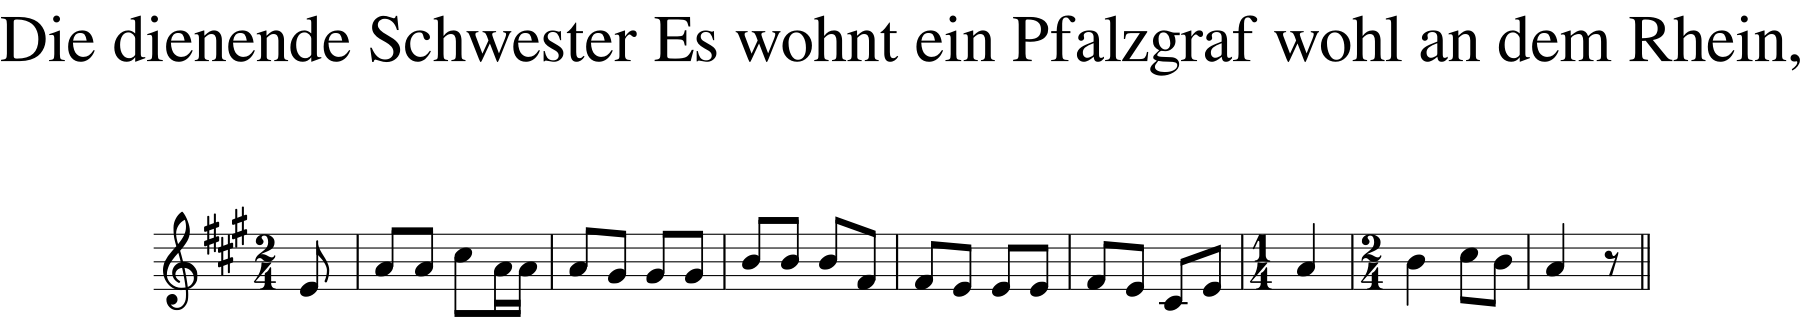

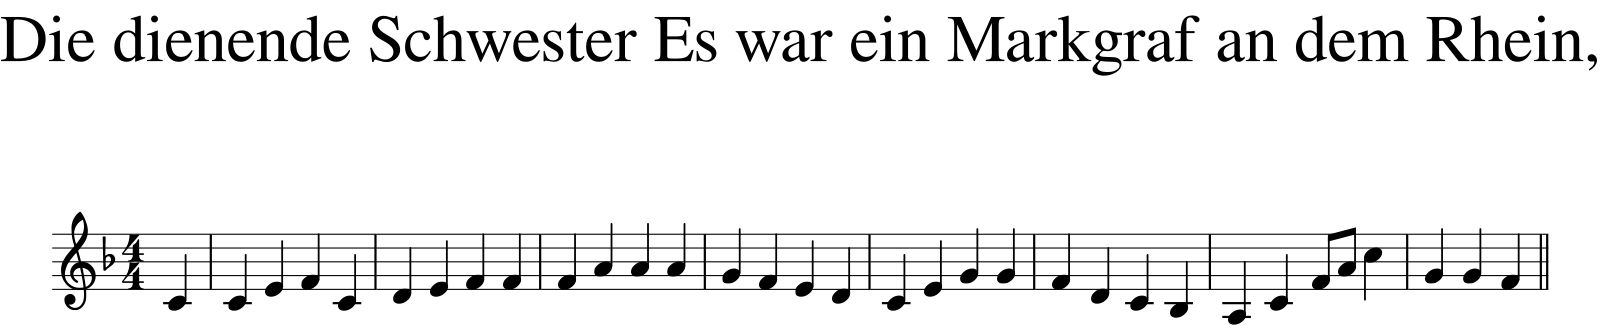

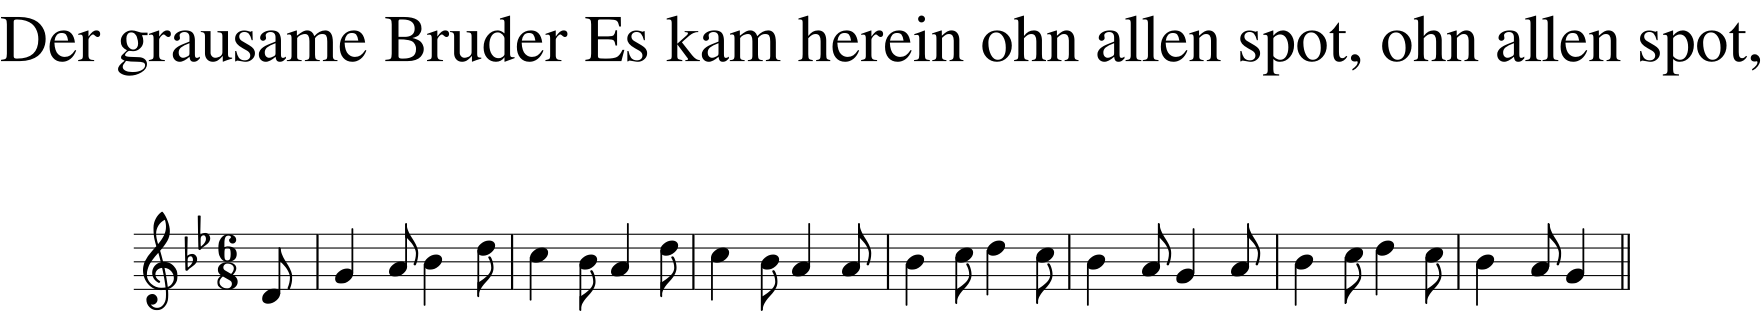

In [ ]:
for file in file_list:
  melody = converter.parse(f"{file}")
  melody.show()

There are a couple of important things here:

- converter.parse is a  ```music21``` function.
- show is ```music21``` function.
- the ```f"{file}"``` line is really powerful. These are called [f-strings](https://realpython.com/python-f-strings/), and they are quite easy to use, especially in Python 3.

Basically an f-string allows you to put variables into things, but also print other things around them. Here, I wanted to add quotation marks around a file variable. Adding the f means that I can put things around that variable, and it will add not just the variable, but whatever other symbols come after the f. The curly brackets are also necessary.

In [ ]:
greeting = "Hello"
other_greeting = "what's up?"


print(f'I really don\'t want to say, {greeting}, or {other_greeting}')

I really don't want to say, Hello, or what's up?


### Back to the Exercise.

Remember, I need to:

- Begin with an image
- Ask a question.
- Provide a set of answers, itemized by a., b., c., *etc.*
- Put an asterisk next to the correct answer.

Let's start by grabbing all of the files. 


*psssst:* Have you noticed that we're using this code a lot? We should probably consider making it into a function?


In [ ]:
def filebrowser(ext="content/MyDrive/python_scratch/ii_chords/*.krn"):
    "Returns files with an extension"
    return[f for f in glob.glob(f'*{ext}')]

file_list = filebrowser()
print(file_list)

['content/MyDrive/python_scratch/ii_chords/ii7.krn', 'content/MyDrive/python_scratch/ii_chords/iihd65.krn', 'content/MyDrive/python_scratch/ii_chords/ii6.krn', 'content/MyDrive/python_scratch/ii_chords/ii65.krn']


## Printing a question

Let's see how we might use f-strings to print a single question.

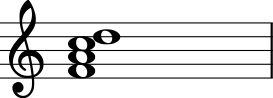



Please provide the correct Roman numeral for the given notation, assuming a major key signature.
*a. ii65
b. ii half-diminished 65
c. ii7
d. ii6


In [ ]:
question = "Please provide the correct Roman numeral for the given notation, assuming a major key signature."
ii65 = "ii65"
iihd65 = "ii half-diminished 65"
ii7 = "ii7"
ii6 = "ii6"

for file in file_list:
  example = converter.parse(f"{file}")
  if "ii65" in file:
    print('\n')
    example.show()
    print('\n')
    print(question)
    print(f'*a. {ii65}\nb. {iihd65}\nc. {ii7}\nd. {ii6}')

## Transposing

We need this to happen in many keys, and for each chord. Perhaps a transposition function would be useful here.


For this, we need to loop over a bunch of keys, and we also need different correct answers depending on what the file is.

A function would be good for this. We could put everything in a single function, and then simply loop over the every file with that function.

In [ ]:
def transposer(piece):
  ### create an array of all the keys I want to transpose to.
  sigs = ["C", "D", "F#", "G", "Gb", "Ab", "Bb", "Db", "Eb", "F"]
  ### parse the file into music21
  example = converter.parse(f"{piece}")
  ### loop over all of my keys
  for keysig in sigs:   
    ##transpose to that key
    k = example.analyze('key')
    i = interval.Interval(k.tonic, pitch.Pitch(keysig))
    ii_chord = example.transpose(i)
    ### put some line breaks in to make in look a bit cleaner.
    print(f'\n\n')  
    ### show the notation.
    ii_chord.show()
    
    """
    print the question. (note that this is defined above. 
    I should probably just define it in the function.)
    """

    print(f'\n{question}\n')

    ### run a conditional that changes answer based on filename.
    if "ii65" in piece:
      print(f'*a. {ii65}\nb. {iihd65}\nc. {ii7}\nd. {ii6}')
    elif "iihd65" in piece:
      print(f'a. {ii65}\n*b. {iihd65}\nc. {ii7}\nd. {ii6}')
    elif "ii7" in piece:
      print(f'a. {ii65}\nb. {iihd65}\n*c. {ii7}\nd. {ii6}')
    else:
      print(f'a. {ii65}\nb. {iihd65}\nc. {ii7}\n*d. {ii6}')

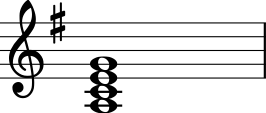


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
*c. ii7
d. ii6





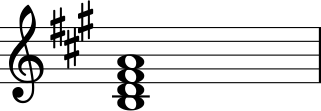


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
*c. ii7
d. ii6





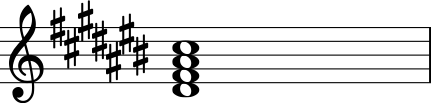


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
*c. ii7
d. ii6





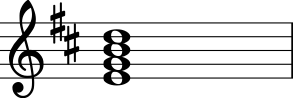


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
*c. ii7
d. ii6





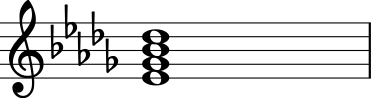


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
*c. ii7
d. ii6





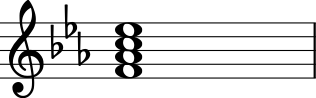


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
*c. ii7
d. ii6





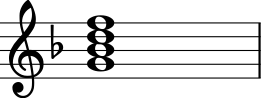


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
*c. ii7
d. ii6





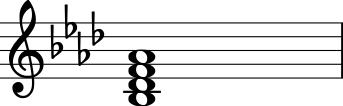


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
*c. ii7
d. ii6





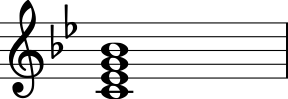


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
*c. ii7
d. ii6





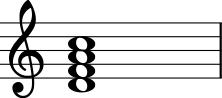


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
*c. ii7
d. ii6





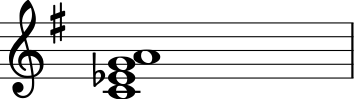


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
*b. ii half-diminished 65
c. ii7
d. ii6





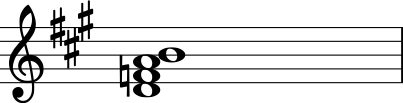


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
*b. ii half-diminished 65
c. ii7
d. ii6





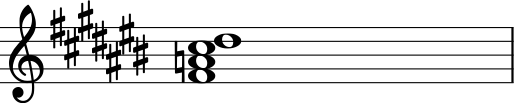


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
*b. ii half-diminished 65
c. ii7
d. ii6





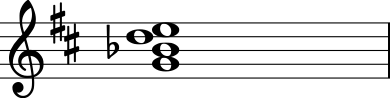


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
*b. ii half-diminished 65
c. ii7
d. ii6





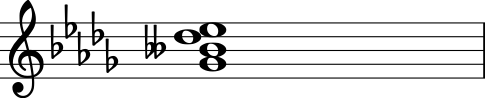


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
*b. ii half-diminished 65
c. ii7
d. ii6





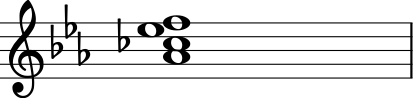


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
*b. ii half-diminished 65
c. ii7
d. ii6





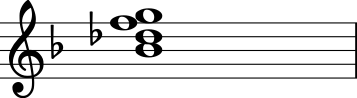


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
*b. ii half-diminished 65
c. ii7
d. ii6





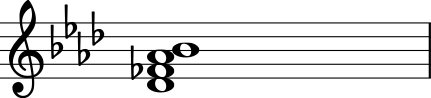


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
*b. ii half-diminished 65
c. ii7
d. ii6





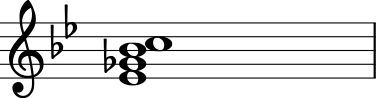


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
*b. ii half-diminished 65
c. ii7
d. ii6





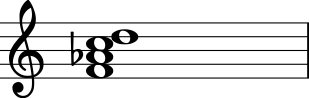


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
*b. ii half-diminished 65
c. ii7
d. ii6





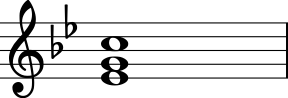


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
c. ii7
*d. ii6





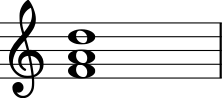


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
c. ii7
*d. ii6





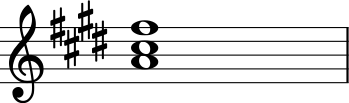


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
c. ii7
*d. ii6





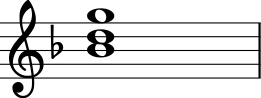


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
c. ii7
*d. ii6





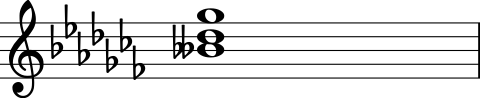


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
c. ii7
*d. ii6





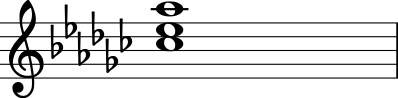


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
c. ii7
*d. ii6





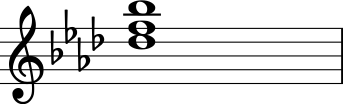


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
c. ii7
*d. ii6





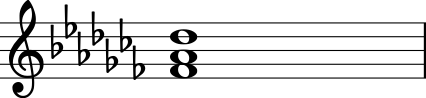


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
c. ii7
*d. ii6





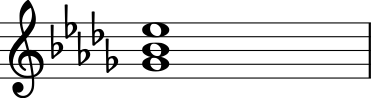


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
c. ii7
*d. ii6





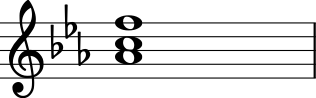


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

a. ii65
b. ii half-diminished 65
c. ii7
*d. ii6





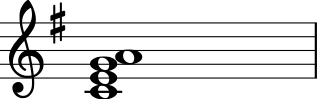


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

*a. ii65
b. ii half-diminished 65
c. ii7
d. ii6





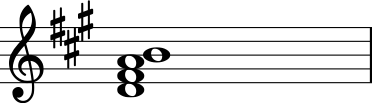


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

*a. ii65
b. ii half-diminished 65
c. ii7
d. ii6





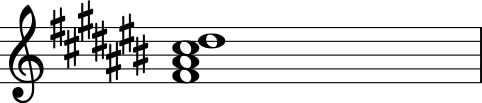


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

*a. ii65
b. ii half-diminished 65
c. ii7
d. ii6





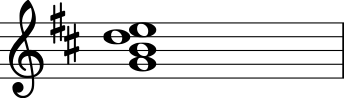


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

*a. ii65
b. ii half-diminished 65
c. ii7
d. ii6





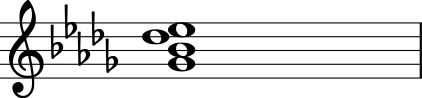


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

*a. ii65
b. ii half-diminished 65
c. ii7
d. ii6





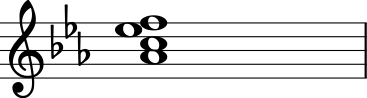


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

*a. ii65
b. ii half-diminished 65
c. ii7
d. ii6





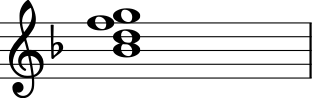


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

*a. ii65
b. ii half-diminished 65
c. ii7
d. ii6





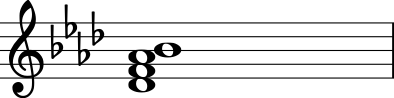


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

*a. ii65
b. ii half-diminished 65
c. ii7
d. ii6





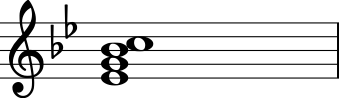


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

*a. ii65
b. ii half-diminished 65
c. ii7
d. ii6





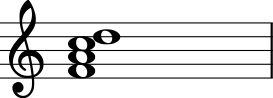


Please provide the correct Roman numeral for the given notation, assuming a major key signature.

*a. ii65
b. ii half-diminished 65
c. ii7
d. ii6


In [ ]:
for file in file_list:
    transposer(file)

## Homework for Monday:

1. Print off (here in Colab) all of Bach's 371 chorales, each in 3 keys. 
2. You can choose whichever keys you would like.

This is the directory of all chorales:

```"content/MyDrive/python_scratch/bach_chorales/*.krn"```